# Introduction

Dans le cadre de ce projet, nous visons à <span style="color:blue; font-weight:bold;">prédire les risques de maladies cardiovasculaires</span> en utilisant des techniques avancées d'apprentissage automatique. L'objectif est de développer plusieurs modèles de classification et de comparer leurs performances pour identifier le modèle le plus précis et efficace.

Le processus de développement d'un modèle de classification comporte plusieurs étapes essentielles. Nous commencerons par une compréhension approfondie des données, suivie de leur préparation pour les rendre adaptées aux modèles d'apprentissage automatique. Ensuite, nous procéderons à la modélisation en appliquant divers algorithmes de classification. Enfin, nous évaluerons les performances de chaque modèle à l'aide de métriques appropriées pour déterminer lequel offre les meilleurs résultats.

Ce travail a été réalisé par:

<ul>
    <li>LAMRINI Imane</li>
    <li>EL MADANI Khadija</li>
    <li>ADBIB Ilham</li>
</ul>


# I. Data understanding (compréhension des données):

###  Importation des bibliothèques (libraries) nécessaires:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importation de l'ensemble de données:

On importe le fichier CSV: <span style="color:blue; font-weight:bold;">Cardiovascular_Diseases.csv</span> qui comporte le dataset (l'ensemble de données), pour s'en baser dans la construction du modèle.

In [3]:
data = pd.read_csv('Cardiovascular_Diseases.csv',sep=',',low_memory=False)

###  Affichage des données:

Pour afficher un aperçu des 10 premières instances de l’ensemble des données.

In [4]:
data.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


### Volume et dimension de Dataset:

Pour afficher le volume (<span style="color:blue; font-weight:bold;">nombre total d’instances</span>) et la dimension des données (<span style="color:blue; font-weight:bold;">nombre total des attributs</span>)

In [5]:
print("Le volume et la dimension des données sont", data.shape, "\n")

Le volume et la dimension des données sont (308854, 19) 



### Type et codage des attributs:

Pour afficher le type de chaque attribut qui est dans le dataset.

In [6]:
print("Le type et le codage des attributs:", "\n")
data.info()

Le type et le codage des attributs: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       299312 non-null  object 
 2   Exercise                      299312 non-null  object 
 3   Heart_Disease                 299312 non-null  object 
 4   Skin_Cancer                   299312 non-null  object 
 5   Other_Cancer                  299312 non-null  object 
 6   Depression                    299312 non-null  object 
 7   Diabetes                      299312 non-null  object 
 8   Arthritis                     299312 non-null  object 
 9   Sex                           299312 non-null  object 
 10  Age_Category                  299312 non-null  object 
 11  Height_(cm)                   299287 non-null  float64
 12  Weight


###  Statistiques descriptives:

Pour afficher les statistiques qui donnent un apercu sur chaque attribut comme: moyenne, écart-type, quartiles, valeur minimale, valeur maximale, etc.

In [7]:
print("Les statistiques descriptives (moyenne, écart-type, quartiles, valeur minimale, valeur maximale, etc.):")
data.describe(include='all')

Les statistiques descriptives (moyenne, écart-type, quartiles, valeur minimale, valeur maximale, etc.):


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854,299312,299312,299312,299312,299312,299312,299312,299312,299312,299312,299287.000000,299311,299312,299312,299312.000000,299312.000000,299312.000000,299311.000000
unique,9547,5,2,2,2,2,2,2,2,2,13,NaN,524,3611,3,NaN,NaN,NaN,NaN
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,NaN,90.72,26.63,No,NaN,NaN,NaN,NaN
freq,107449,231520,232412,275231,270249,270415,239899,259141,202066,153867,32321,NaN,16105,3250,178100,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.719734,NaN,NaN,NaN,5.134111,29.858245,15.110964,6.306450
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.649743,NaN,NaN,NaN,8.222629,24.885926,14.917528,8.588447
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,NaN,NaN,NaN,0.000000,12.000000,4.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.000000,NaN,NaN,NaN,1.000000,30.000000,12.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.000000,NaN,NaN,NaN,6.000000,30.000000,20.000000,8.000000


## Analyse et interpréation des différents valeurs

### - Analyse:

Cette analyse détaillée est celle de la statistique descriptive, basée sur les données suivantes: taille (Height_(cm)), consommation d'alcool (Alcohol_Consumption), consommation de fruits (Fruit_Consumption), consommation de légumes verts (Green_Vegetables_Consumption) et consommation des pommes de terre frites (FriedPotato_Consumption).

#### - Taille(Height in cm):

L'analyse sur la taille montre que sur 299287 observations, la taille moyenne des individus est de 170.72 cm, avec un écart-type de 10.65, indiquant une variation modérée. Les tailles varient de 91 à 241 cm, démontrant une grande diversité. La médiane est de 170 cm, avec 25% des individus mesurant moins de 163 cm et 75% moins de 178 cm.

#### - Consommation d'Alcool (en nombre de fois par mois):

Sur 299312 réponses, la consommation moyenne d'alcool est de 5.13 fois par mois, avec une forte variation, comme l'indique un écart-type de 8.22. La consommation varie entre 0 et 30 fois par mois, montrant que certains ne consomment pas d'alcool tandis que d'autres en consomment beaucoup. Concernant les quartiles, 25% des individus ne consomment pas d'alcool, 50% consomment jusqu'à 1 fois par mois et 75% jusqu'à 6 fois.

#### - Consommation de Fruits (en fois par mois):

L'analyse de la consommation de fruits montre que sur 299312 observations, chaque individu consomme en moyenne 29.86 fruits par mois, avec une variation significative indiquée par un écart-type de 24.89. La consommation varie de 0 à 120, ce qui révèle une grande disparité : certains ne consomment pas de fruits tandis que d'autres en consomment abondamment. Concernant les quartiles, 25% des individus consomment jusqu'à 12, 50% consomment jusqu'à 30, et 75% ne dépassent pas 30 fruits.

#### - Consommation de Légumes Verts (en fois par mois):

Cette analyse révèle que sur 299312 observations, la consommation moyenne de légumes verts est de 15.11 portions par mois, avec un écart-type de 14.92. Les individus consomment entre 0 et 128 portions par mois, indiquant que certains ne consomment pas du tout de légumes verts tandis que d'autres en mangent fréquemment. Les quartiles montrent que 25% des individus consomment jusqu'à 4, 50% jusqu'à 12, et 75% jusqu'à 20 portions par mois.

#### - Consommation de Pommes de Terre Frites (en fois par mois):

L'analyse de la consommation de pommes de terre frites, basée sur 299311 observations, montre que la moyenne mensuelle est de 6.31 portions par personne, avec une forte variation comme le montre l'écart-type de 8.59. La consommation oscille entre 0 et 128 portions par mois, révélant que certains individus ne consomment pas du tout de frites tandis que d'autres en consomment fréquemment. Les quartiles démontrent que 25% des personnes consomment jusqu'à 2, 50% jusqu'à 4, et 75% consomment jusqu'à 8 par mois.

### - Interprétation:

Consommation d'alcool et consommation de pommes de terre frites montrent les plus grandes variabilités, suggérant des différences marquées dans les comportements de consommation parmi les individus.

La taille a la distribution la moins large parmi les variables, indiquant moins de variabilité relative par rapport aux habitudes de consommation.

Les distributions de la consommation de fruits et de légumes verts montrent que beaucoup de gens consomment des quantités modérées de ces aliments.

### Visualisation des données:

Pour approfondir notre compréhension des données et rechercher d'éventuelles corrélations entre la variable cible et les attributs prédictifs, nous allons créer plusieurs types de graphiques.

### - Histogrammes

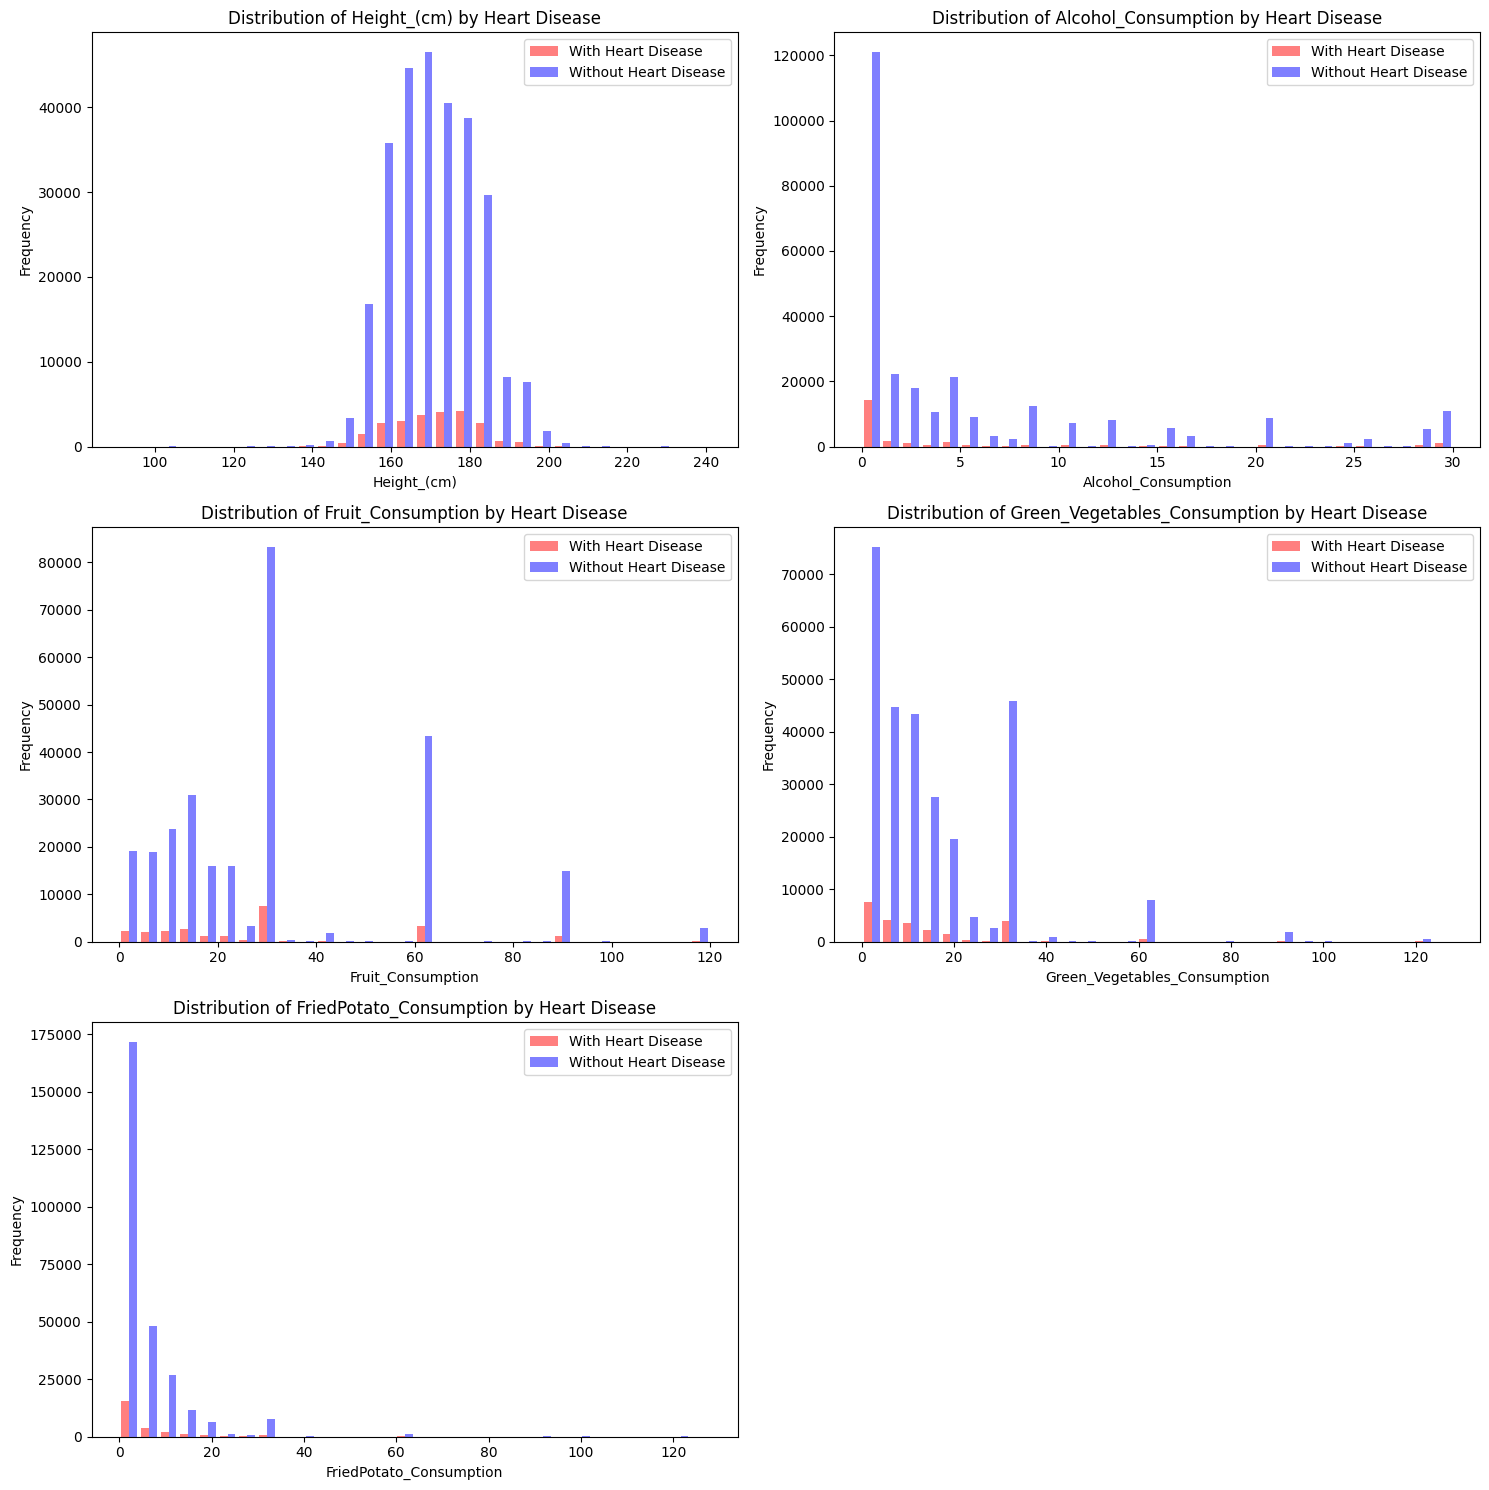

In [8]:
import matplotlib.pyplot as plt

# Define the columns to plot
columns = ['Height_(cm)','Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Ensure columns exist in the DataFrame and are numeric
columns = [col for col in columns if col in data.columns and pd.api.types.is_numeric_dtype(data[col])]

plt.figure(figsize=(15, 15))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)

    # Group data by 'Heart_Disease'
    groups = data.groupby('Heart_Disease')[column]

    # Ensure groups 'Yes' and 'No' exist and are numeric
    yes_group = groups.get_group('Yes').dropna().astype(float) if 'Yes' in groups.groups else []
    no_group = groups.get_group('No').dropna().astype(float) if 'No' in groups.groups else []

    # Plot histograms for each group
    plt.hist([yes_group, no_group],
             bins=30, alpha=0.5, label=['With Heart Disease', 'Without Heart Disease'], color=['red', 'blue'])

    # Add labels and titles
    plt.title(f'Distribution of {column} by Heart Disease')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

## Analyse et interprétation des histogrammes

Ces histogrammes représentent la distribution de différentes variables en fonction de la présence ou non d'une maladie cardiaque.


*   Height(cm): Il n'y a pas de différence évidente de hauteur entre les individus avec et sans maladie cardiaque.


* Consommation d'Alcool :La plupart des participants ne consomment pas d'alcool (valeur de 0), et la fréquence diminue rapidement pour des consommations plus élevées. Cela signifie que la majorité des individus consomment peu ou pas d'alcool.


*   Consommation de fruits:
        - La consommation de fruits est majoritairement faible chez les deux groupes.
        - Une proportion notable d'individus avec une maladie cardiaque consomment peu de fruits.
     Il semble y avoir une tendance pour les individus avec une maladie cardiaque à consommer moins de fruits, mais cela pourrait être influencé par d'autres facteurs.
   
   
*   Consommation de légumes:
        - Les individus sans maladie cardiaque ont une plus large gamme de consommation
        - Une proportion notable de personnes avec une maladie cardiaque consomment peu de légumes verts.
     Il y a une légère tendance pour les individus avec une maladie cardiaque à consommer moins de légumes verts.


*   Consommation de pommes de terre frites:
         - La consommation est généralement faible pour les deux groupes
         - Une proportion notable d'individus avec une maladie cardiaque consomment peu de pommes de terre frites.
       
       
*  **Syntèse**:
        - Les distributions montrent que la majorité des individus, qu'ils aient ou non une maladie cardiaque, ont des habitudes de consommation similaires pour les fruits, légumes verts, et pommes de terre frites, ainsi que des mesures similaires de hauteur et de consommation d'alcool.
        - Les individus avec une maladie cardiaque tendent à consommer légèrement moins de fruits et de légumes verts et montrent des habitudes de consommation d'alcool assez basses.


### - Nuages de points

<ipython-input-9-8946f6e4d48c>:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


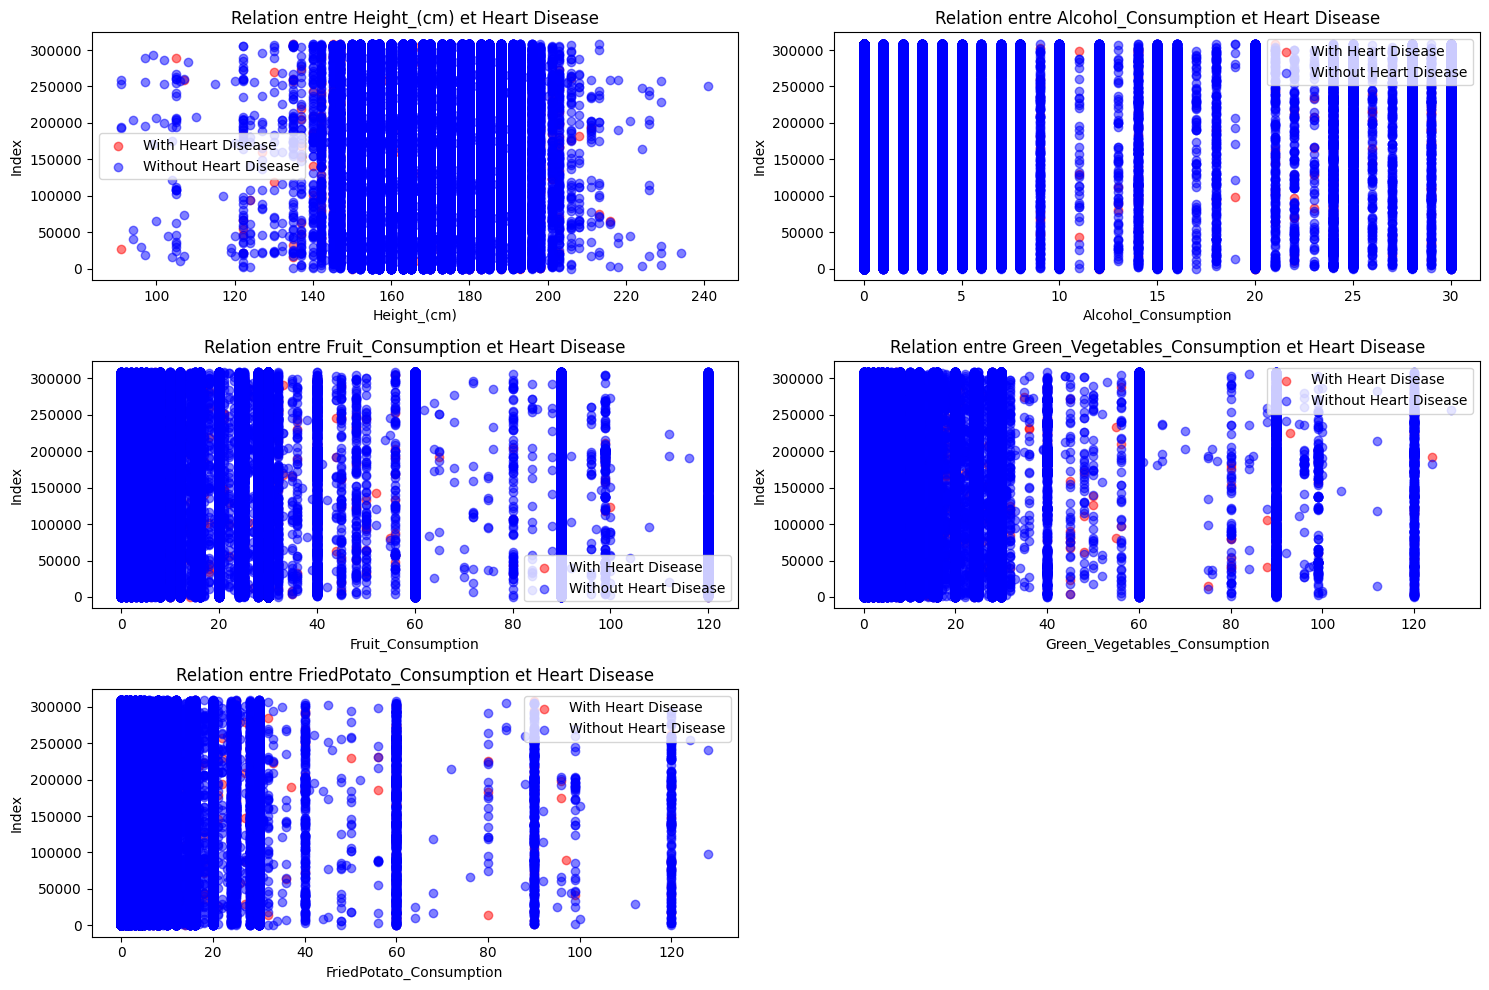

In [9]:
columns = ['Height_(cm)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

data[columns] = data[columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)

    # Tracer le nuage de points pour la variable en fonction de la maladie cardiovasculaire
    plt.scatter(data[data['Heart_Disease'] == 'Yes'][column], data[data['Heart_Disease'] == 'Yes'].index,
                alpha=0.5, label='With Heart Disease', color='red')
    plt.scatter(data[data['Heart_Disease'] == 'No'][column], data[data['Heart_Disease'] == 'No'].index,
                alpha=0.5, label='Without Heart Disease', color='blue')


    # Les étiquettes et des titres
    plt.title(f'Relation entre {column} et Heart Disease')
    plt.xlabel(column)
    plt.ylabel('Index')
    plt.legend()

plt.tight_layout()
plt.show()

## Analyse et interprétation des nuages de points:

- Distribution de la Taille (Height_(cm)):

Concernant la hauteur, aucune corrélation significative n'est observée, indiquant que la hauteur n'influence pas directement les risques cardiovasculaires.

- Distribution de la Consommation d'Alcool (Alcohol_Consumption):

La consommation d'alcool montre une plus grande variabilité chez les individus sans maladie cardiovasculaire, suggérant une absence de corrélation directe entre la consommation modérée et le risque cardiovasculaire.

- Distribution de la Consommation de Fruits (Fruit_Consumption) et de Légumes Verts (Green_Vegetables_Consumption):

Pour la consommation de fruits et de légumes verts, les données indiquent que les personnes sans maladie cardiovasculaire consomment ces aliments plus fréquemment, ce qui peut refléter leurs bienfaits pour la santé cardiovasculaire.

- Distribution de la Consommation de Pommes de Terre Frites (FriedPotato_Consumption):

La consommation de pommes de terre frites ne montre pas de tendance claire qui pourrait lier directement sa consommation à l'incidence des maladies cardiovasculaires, nécessitant une investigation plus détaillée pour des conclusions définitives.

### - Boîtes à moustaches

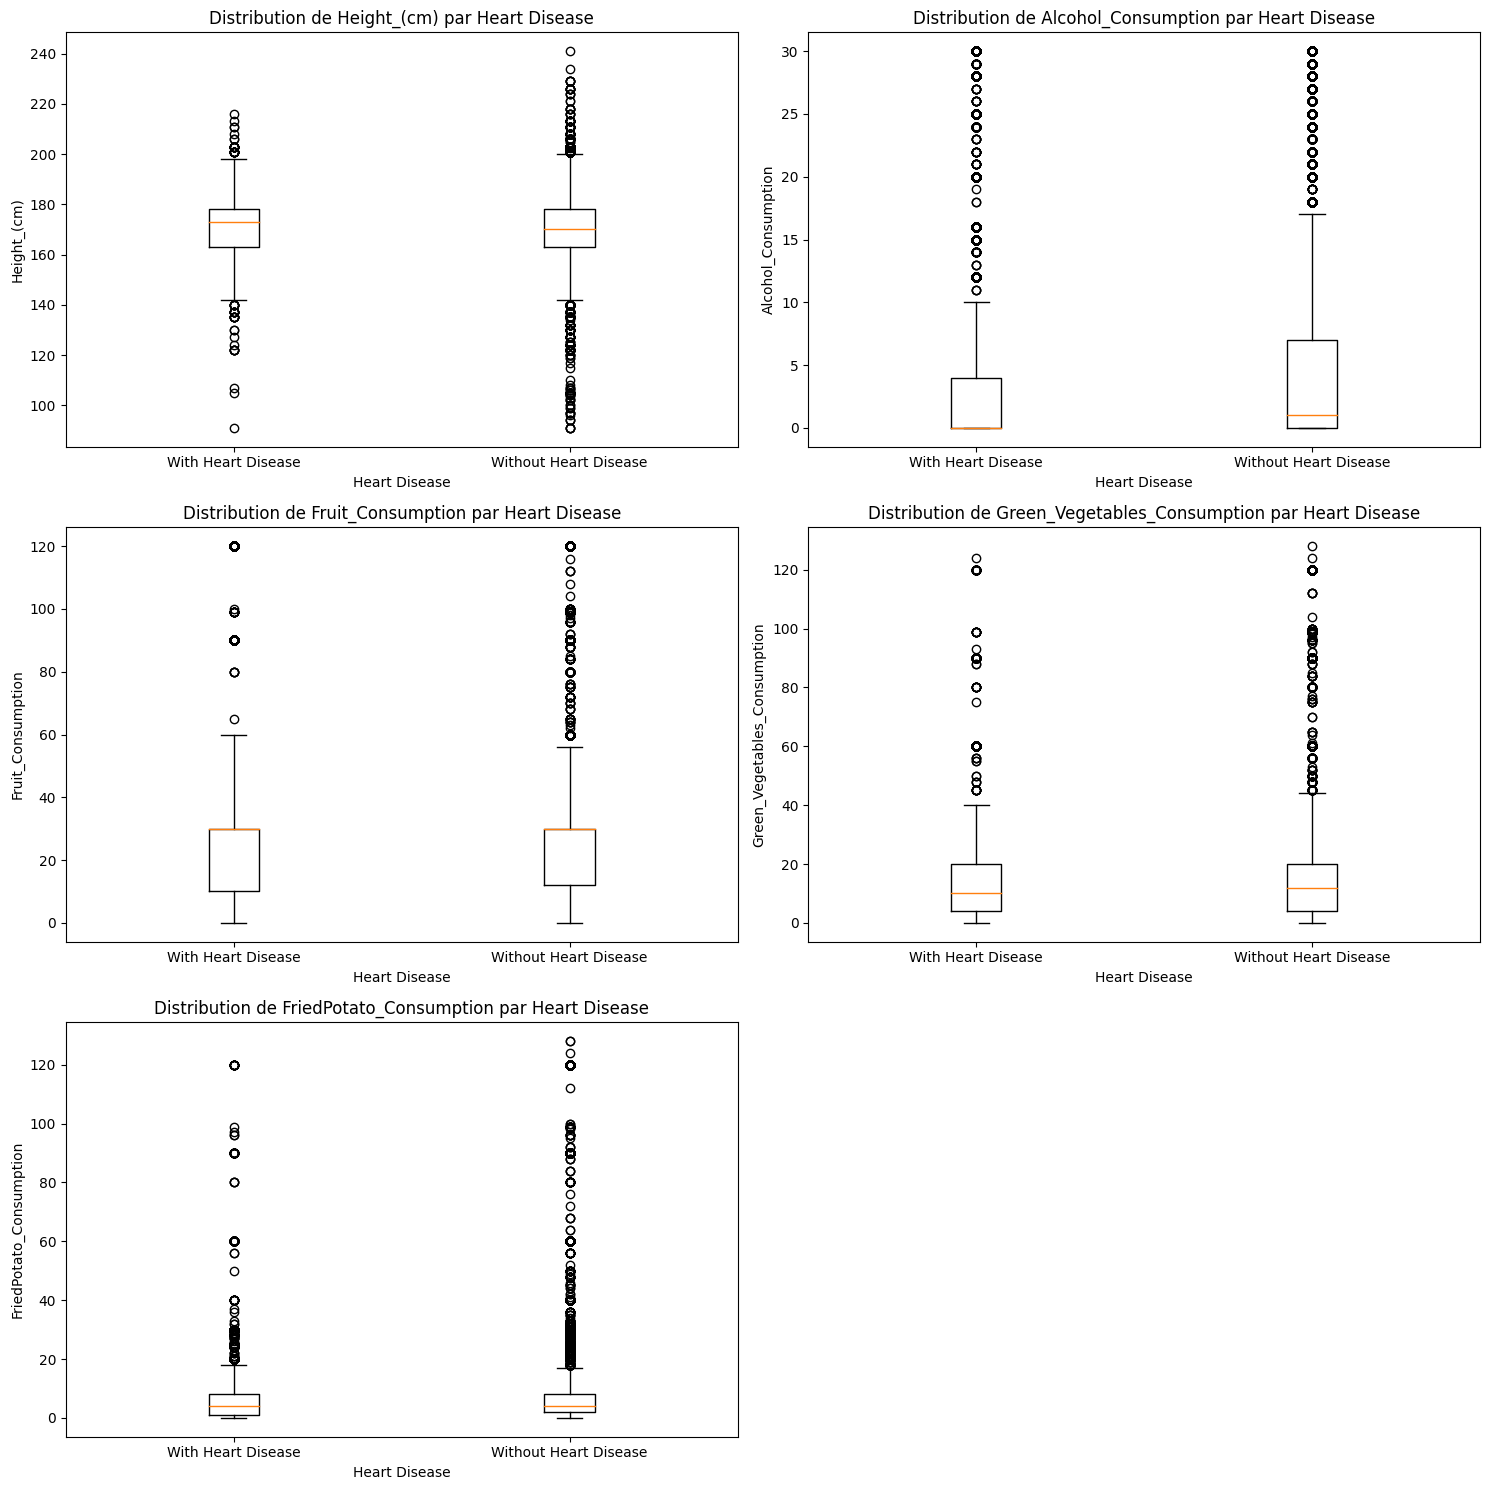

In [10]:
columns = ['Height_(cm)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

data[columns] = data[columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(15, 15))

for i, column in enumerate(columns):
    plt.subplot(3, 2, i + 1)

    # Séparer les données en fonction de la condition de la maladie cardiovasculaire
    group_yes = data[data['Heart_Disease'] == 'Yes'][column].dropna()
    group_no = data[data['Heart_Disease'] == 'No'][column].dropna()

    # Tracer la boîte à moustaches pour chaque groupe
    plt.boxplot([group_yes, group_no], labels=['With Heart Disease', 'Without Heart Disease'], patch_artist=False)

    # Les étiquettes et des titres
    plt.title(f'Distribution de {column} par Heart Disease')
    plt.xlabel('Heart Disease')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

## Analyse et interprétation des Boîtes à moustaches

- Distribution de la Taille (Height_(cm)):

Concernant la hauteur, aucune corrélation significative n'est observée, indiquant que la hauteur n'influence pas directement les risques cardiovasculaires.

- Distribution de la Consommation d'Alcool (Alcohol_Consumption):

Les individus sans maladie cardiovasculaire semblent consommer plus d'alcool, comme en témoignent les quartiles supérieurs et les valeurs extrêmes. Cela pourrait indiquer que la consommation d'alcool n'est pas directement corrélée à un risque accru de maladie cardiovasculaire ou que les données peuvent inclure des facteurs de style de vie compensatoires.

- Distribution de la Consommation de Fruits (Fruit_Consumption) et de Légumes Verts (Green_Vegetables_Consumption):

La consommation montre des valeurs extrêmes plus hautes chez les personnes sans maladie cardiovasculaire, renforçant l'idée que la consommation régulière de légumes est associée à une meilleure santé cardiovasculaire.

- Distribution de la Consommation de Pommes de Terre Frites (FriedPotato_Consumption):

Les individus avec maladie cardiovasculaire montrent une médiane plus basse et moins de valeurs extrêmes dans la consommation de pommes de terre frites, suggérant que ceux avec des conditions cardiovasculaires peuvent limiter leur consommation d'aliments potentiellement malsains.

# II. Nettoyage des données

### Rechercher et afficher le nombre de doublons dans l'ensemble des données:

In [11]:
# Afficher le nombre de doublons dans l'ensemble des données
print("Nombre de doublons dans l'ensemble des données: ", data.duplicated().sum())

Nombre de doublons dans l'ensemble des données:  80


### Afficher un tableau des doublons:

Pour afficher l'extrait du dataset, contenant seulement les doublons dans tous les attributs.

In [12]:
# Afficher un tableau des doublons
doublons = data[data.duplicated()]
print(doublons)

       General_Health               Checkup Exercise Heart_Disease  \
46402            Good  Within the past year      Yes            No   
49287       Very Good  Within the past year      Yes            No   
75448       Excellent  Within the past year      Yes            No   
76857       Excellent  Within the past year      Yes            No   
78871            Good  Within the past year      Yes            No   
...               ...                   ...      ...           ...   
301474           Good  Within the past year      Yes            No   
303040      Very Good  Within the past year      Yes            No   
303600           Good  Within the past year      Yes            No   
303609      Very Good  Within the past year      Yes            No   
308375      Very Good  Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
46402           No           No        Yes       No        No  Female   
49287        

### Suppression  de doublons:

Va nous permettre de poursuivre la construction de notre modèle avec un dataset sans doublons

In [13]:
# Supprimer les doublons détectés
data= data.drop_duplicates()

### Vérification de suppression de doublons:

In [14]:
print("Nombre de lignes après suppression des doublons:", data.duplicated().sum())

Nombre de lignes après suppression des doublons: 0


### Détection et traitement des valeurs manquantes:

Aprés avoir détecté les valeurs manquantes, on a remplacé les valeurs contenant des espaces (' ') par des valeurs manquantes (NaN) dans les colonnes Weight_(kg) et Height_(cm), on a Ajouté une nouvelle colonne BMI au DataFrame, contenant l'IMC (Indice de Masse Corporelle), calculé pour chaque individu, en se basant sur ces derniers attributs, en premier lieu (constatation de dépendance entre les mesures de la taille et le poids, et l'Indice de Masse Corporelle), et finalement on a supprimé toutes les lignes du DataFrame qui contiennent des valeurs manquantes.

In [15]:
print("Nombre de valeurs manquantes pour chaque attribut avant traitement:")
print(data.isnull().sum())
data.loc[:, 'Weight_(kg)'] = data['Weight_(kg)'].replace(' ', np.nan)
data.loc[:, 'Height_(cm)'] = data['Height_(cm)'].replace(' ', np.nan)
data.loc[:, 'Weight_(kg)'] = pd.to_numeric(data['Weight_(kg)'], errors='coerce')
data.loc[:, 'Height_(cm)'] = data['Height_(cm)'].astype(float)
data.loc[:, 'BMI'] = data['Weight_(kg)'] / (data['Height_(cm)'] / 100)**2

# Supprimer les lignes avec des valeurs manquantes
data = data.dropna()
print("\nNombre de valeurs manquantes après traitement: ")
data.isnull().sum()

Nombre de valeurs manquantes pour chaque attribut avant traitement:
General_Health                     0
Checkup                         9542
Exercise                        9542
Heart_Disease                   9542
Skin_Cancer                     9542
Other_Cancer                    9542
Depression                      9542
Diabetes                        9542
Arthritis                       9542
Sex                             9542
Age_Category                    9542
Height_(cm)                     9567
Weight_(kg)                     9543
BMI                             9542
Smoking_History                 9542
Alcohol_Consumption             9542
Fruit_Consumption               9542
Green_Vegetables_Consumption    9542
FriedPotato_Consumption         9543
dtype: int64

Nombre de valeurs manquantes après traitement: 


General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

### Transformation de type de données

Comme notre dataset contient des valeurs catégorielles au lieu de numérique pour 'Weight', 'BMI' et d'autres attributs du dataset, donc nous sommes obligés et en mesure de faire une transformation au niveau de leur type, en utilisant le processus de **LabelEncoder**. Et pour s'assurer que la transformation de types des attributs a été bien munie, on les affichait avec leurs nouveaux types.

In [16]:
cols = data.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in cols:
    data[column]=le.fit_transform(data[column])

In [17]:
print(data.dtypes)

General_Health                    int64
Checkup                           int64
Exercise                          int64
Heart_Disease                     int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Sex                               int64
Age_Category                      int64
Height_(cm)                     float64
Weight_(kg)                       int64
BMI                               int64
Smoking_History                   int64
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object


In [18]:
data.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,150.0,9,98,1,0.0,30.0,16.0,12.0
1,4,4,0,1,0,0,0,1,0,0,10,165.0,145,2644,0,0.0,30.0,0.0,4.0
2,4,4,1,0,0,0,0,1,0,0,8,163.0,180,3619,0,4.0,12.0,3.0,16.0
3,3,4,1,1,0,0,0,1,0,1,11,180.0,195,2755,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,0,0,1,12,191.0,180,1733,1,0.0,8.0,4.0,0.0
5,2,4,0,0,0,0,1,0,1,1,8,183.0,362,5405,0,0.0,12.0,12.0,12.0
6,1,4,1,1,0,0,0,0,1,1,8,175.0,121,1407,1,0.0,16.0,8.0,0.0
7,2,4,1,0,0,0,0,0,1,0,9,165.0,242,4669,1,3.0,30.0,8.0,8.0
8,1,4,0,0,0,0,1,0,0,0,9,163.0,130,2439,1,0.0,12.0,12.0,4.0
9,1,4,0,0,0,0,0,1,1,0,10,163.0,189,3813,0,0.0,12.0,12.0,1.0


# III. Transformation des Données:

Dans cette section, nous transformerons le dataset en supprimant les attributs non pertinents, en créant de nouveaux attributs,et en normalisant les attributs numériques.

## Normalisation:

- Convertir les valeurs de consommation en une base mensuelle (éventuellement), si elles sont initialement sur une autre échelle (comme un total mensuel ou une moyenne quotidienne). En divisant par 30, on obtient une valeur moyenne quotidienne si les données originales représentaient une consommation totale mensuelle, pour une coordination avec la logique des autres attributs du dataset, et maintenir des valeurs faciles de les utiliser dans les prochaines modèles.

In [19]:
data['Alcohol_Consumption'] = data['Alcohol_Consumption']/30
data['Fruit_Consumption'] = data['Fruit_Consumption']/30
data['Green_Vegetables_Consumption'] = data['Green_Vegetables_Consumption']/30
data['FriedPotato_Consumption'] = data['FriedPotato_Consumption']/30

## Suppression des colonnes non pertinentes:

En se basant sur notre compréhension de données, on va supprimer l'attribut suivant:

     - Height(cm): Concernant la hauteur, aucune corrélation significative n'est observée d'aprés les histogrammes, indiquant que la hauteur influence les risques cardiovasculaires.
     
     - Weight_(kg): Déjà l'influence du poid est déjà constatée à partir de l'indice BMI


In [20]:
del_col = ['Height_(cm)', 'Weight_(kg)']
data = data.drop(del_col, axis=1)

In [21]:
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,98,1,0.000000,1.000000,0.533333,0.400000
1,4,4,0,1,0,0,0,1,0,0,10,2644,0,0.000000,1.000000,0.000000,0.133333
2,4,4,1,0,0,0,0,1,0,0,8,3619,0,0.133333,0.400000,0.100000,0.533333
3,3,4,1,1,0,0,0,1,0,1,11,2755,0,0.000000,1.000000,1.000000,0.266667
4,2,4,0,0,0,0,0,0,0,1,12,1733,1,0.000000,0.266667,0.133333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308848,2,3,1,0,0,0,0,0,0,1,7,999,0,0.000000,0.533333,0.400000,0.000000
308849,4,4,1,0,0,0,0,0,0,1,1,2778,0,0.133333,1.000000,0.266667,0.000000
308850,1,3,1,0,0,0,0,1,0,1,9,1142,0,0.266667,0.500000,2.000000,0.133333
308852,4,4,1,0,0,0,0,0,0,1,9,1602,0,0.100000,1.000000,0.400000,0.000000


In [22]:
data.to_csv('Cardiovascular_Diseases_Cleaned.csv', index=False)

## Visualisation de répartition des cas de maladie cardiaque dans le dataset:

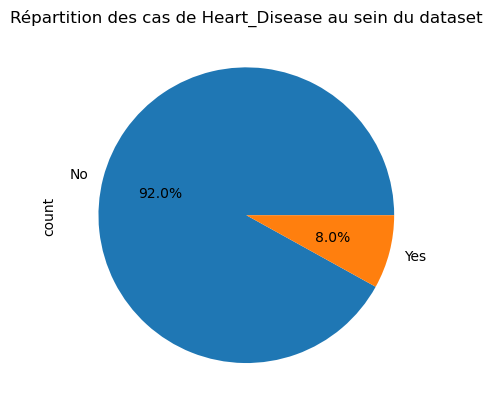

In [2]:
# Compter les occurrences des différentes valeurs de la colonne 'Heart_Disease'
counts = data['Heart_Disease'].value_counts()
# Tracer le graphique circulaire
counts.plot(kind='pie', autopct='%1.1f%%')
# Ajouter un titre
plt.title('Répartition des cas de Heart_Disease au sein du dataset')
# Afficher le graphique
plt.show()

La répartition des données montre que notre Dataset est désiquilibrée, donc on va essayer d'équilibrer les classes de 'Heart_Disease' en sous-échantillonnant les données sans maladie cardiaque (Heart_Disease == 0)

In [24]:
data_hd_0 = data[data['Heart_Disease'] == 0]
data_hd_1 = data[data['Heart_Disease'] == 1]
data_hd_0_sampled = data_hd_0.sample(n=len(data_hd_1), random_state=42)
data_eq = pd.concat([data_hd_0_sampled, data_hd_1])
data_eq.to_csv('Cardiovascular_Diseases_Equilibre.csv', index=False)

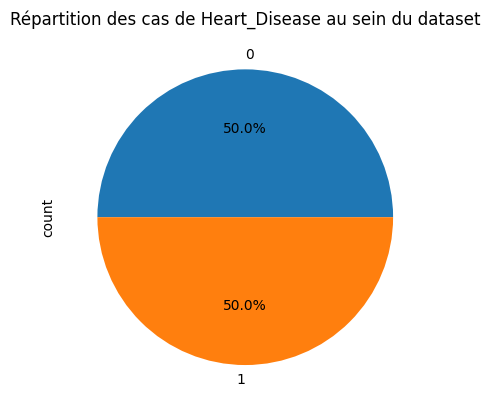

In [25]:
# Compter les occurrences des différentes valeurs de la colonne 'Heart_Disease'
counts = data_eq['Heart_Disease'].value_counts()
# Tracer le graphique circulaire
counts.plot(kind='pie', autopct='%1.1f%%')
# Ajouter un titre
plt.title('Répartition des cas de Heart_Disease au sein du dataset')
# Afficher le graphique
plt.show()

# IV. Création et validation des modèles:

Dans cette section, nous créerons et validerons quatre modèles de classification supervisée : k-NN (KNeighborsClassifier), Arbres de Décision (DecisionTreeClassifier), Régression Logistique (LogisticRegression) et Support Vector Machines (SVM). Nous évaluerons leurs performances en utilisant l'Exactitude (Accuracy), la Précision (Precision), le Rappel (Recall) et le F1-Score.



*   Séparer les données en ensembles d'entraînement(75%) et de test(25%) pour évaluer les performances des modèles de manière indépendante.


*   Évaluer les modèles à l'aide de métriques de classification et d'une matrice de confusion.
Tracer les courbes Precision-Recall et ROC-AUC pour visualiser les performances des modèles.


*   Mettre en place une fonction utilisant GridSearchCV pour effectuer une recherche exhaustive des meilleurs hyperparamètres pour les modèles, afin d'optimiser leur performance.






In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('Cardiovascular_Diseases_Equilibre.csv')

# Split the dataset
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the function to evaluate the model
def evaluer_modele(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Set the colormap to Blues
    plt.show()

# Define the function to plot the Precision-Recall and ROC-AUC curves
def plot_precision_recall_roc_auc(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    plt.plot(recall, precision, label='Precision-Recall curve', color='blue')  # Set the color to blue
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    plt.plot(fpr, tpr, label='ROC curve', color='blue')  # Set the color to blue
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Define the function to perform GridSearchCV for hyperparameter tuning
def tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print("Meilleurs parametres: ", grid_search.best_params_)
    print("Meilleur score: ", grid_search.best_score_)
    return grid_search.best_estimator_

La matrice de confusion présentée montre les performances du modèle en termes de prédictions correctes et incorrectes pour deux classes : absence de maladie cardiaque (0) et présence de maladie cardiaque (1).

### **KNN**

Meilleurs parametres:  {'metric': 'manhattan', 'n_neighbors': 11}
Meilleur score:  0.6937814389219623
              precision    recall  f1-score   support

           0       0.73      0.66      0.69      5988
           1       0.69      0.76      0.73      6052

    accuracy                           0.71     12040
   macro avg       0.71      0.71      0.71     12040
weighted avg       0.71      0.71      0.71     12040



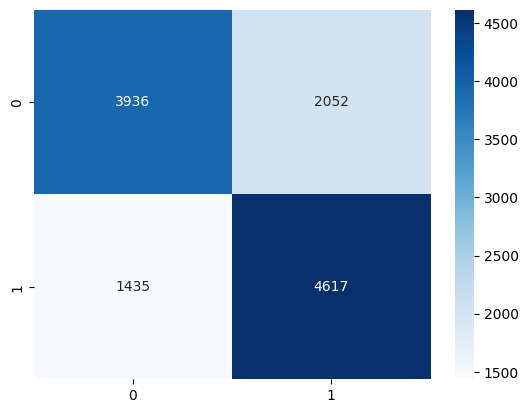

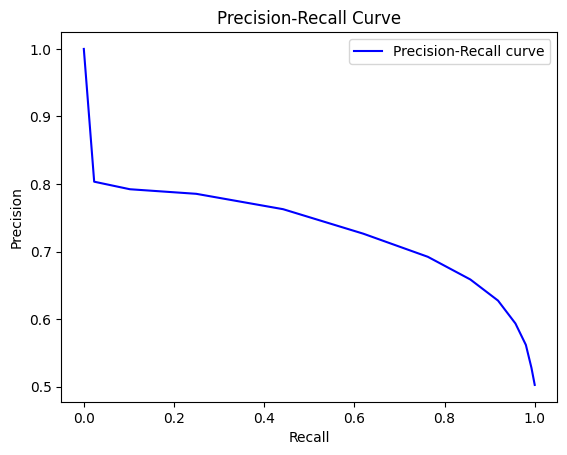

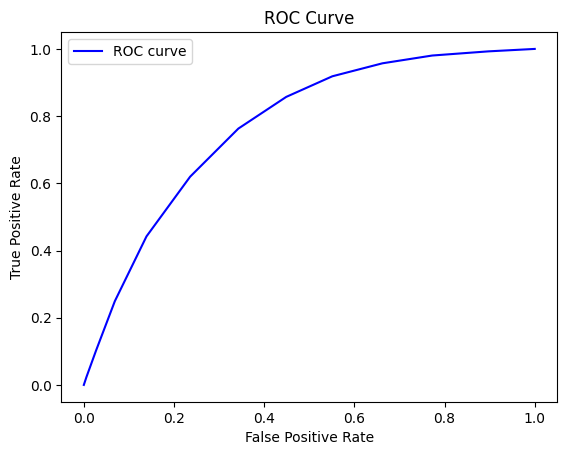

In [27]:
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'metric': ['euclidean', 'manhattan']}
knn_best = tuning(knn, knn_param_grid, X_train, y_train)
evaluer_modele(knn_best, X_test, y_test)
plot_precision_recall_roc_auc(knn_best, X_test, y_test)

***Performance globale KNN:***

 Le modèle (KNN)atteint une précision globale de 71%, ce qui indique une performance raisonnable mais avec une marge d'amélioration.</br>
 
***- Classe 0 :*** Le modèle a une bonne précision (73%) mais un rappel plus faible (66%), ce qui signifie qu'il manque certains cas d'absence de maladie cardiaque.</br>

***- Classe 1 :*** Le modèle a un bon rappel (76%) mais une précision légèrement plus faible (69%), indiquant qu'il est relativement bon pour détecter les cas de maladie cardiaque, mais fait encore des erreurs.

### ***DecisionTree***

Meilleurs parametres:  {'criterion': 'entropy'}
Meilleur score:  0.6636302200933434
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      5988
           1       0.67      0.67      0.67      6052

    accuracy                           0.67     12040
   macro avg       0.67      0.67      0.67     12040
weighted avg       0.67      0.67      0.67     12040



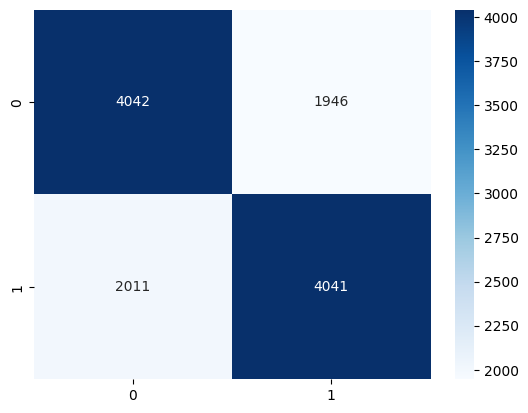

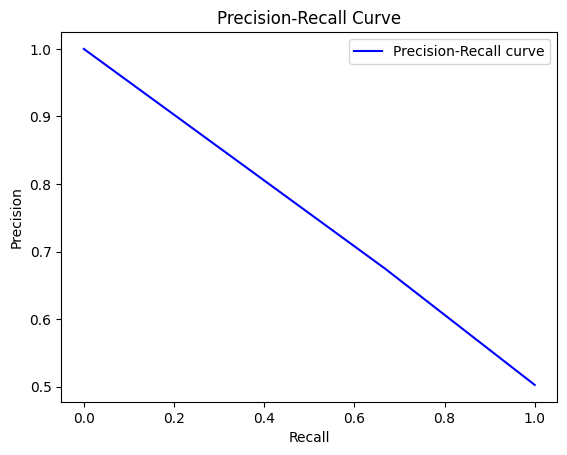

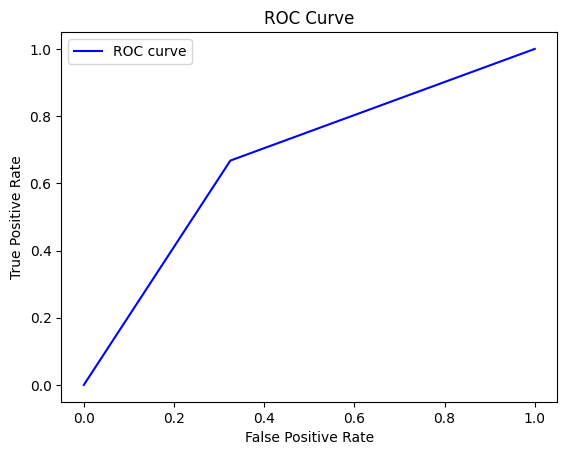

In [28]:
dt = DecisionTreeClassifier()
dt_param_grid = {'criterion': ['entropy', 'gini']}
dt_best = tuning(dt, dt_param_grid, X_train, y_train)
evaluer_modele(dt_best, X_test, y_test)
plot_precision_recall_roc_auc(dt_best, X_test, y_test)

***Performance globale Decision tree:***

ce qui est moins bon comparé au modèle KNN (71%). Cependant, il reste raisonnable. </br>

***- Classe 0 :*** Le modèle a une précision et un rappel de 67%, ce qui signifie qu'il a une performance équilibrée mais moyenne pour prédire l'absence de maladie cardiaque.</br>

***- Classe 1 :*** Le modèle a également une précision et un rappel de 67%, indiquant qu'il est équilibré mais avec une performance moyenne pour détecter les cas de maladie cardiaque.</br>
Le modèle Decision Tree a une performance équivalente pour les deux classes, mais globalement, sa précision est inférieure à celle du modèle KNN

### ***LogisticRegression***

Meilleurs parametres:  {'max_iter': 2000, 'solver': 'sag'}
Meilleur score:  0.7406556804743798
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      5988
           1       0.73      0.78      0.75      6052

    accuracy                           0.75     12040
   macro avg       0.75      0.75      0.75     12040
weighted avg       0.75      0.75      0.75     12040



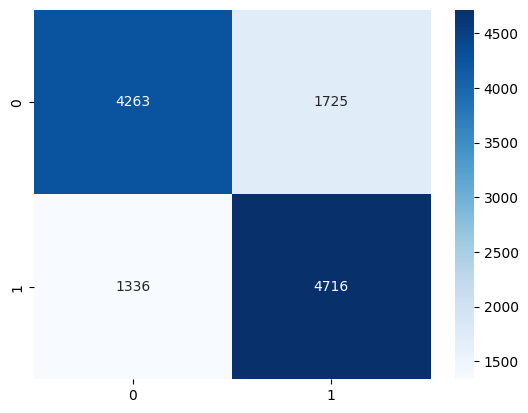

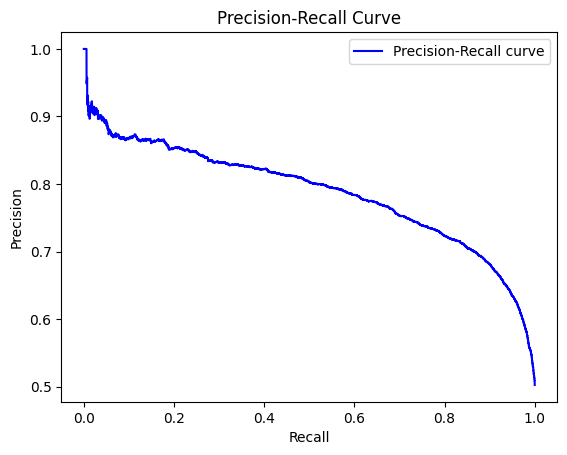

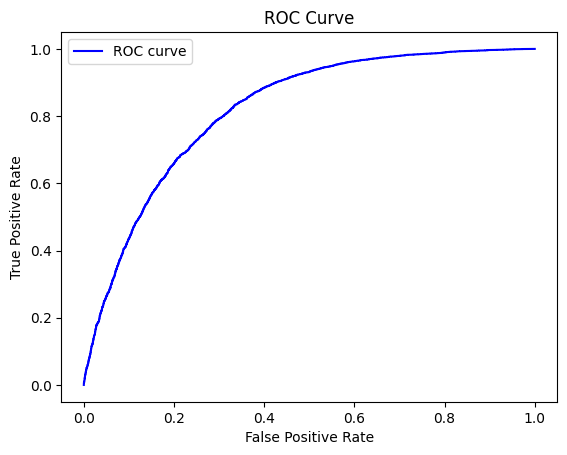

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000, solver='liblinear')
lr_param_grid = {'max_iter': [1000, 2000, 3000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lr_best = tuning(lr, lr_param_grid, X_train_scaled, y_train)
evaluer_modele(lr_best, X_test_scaled, y_test)
plot_precision_recall_roc_auc(lr_best, X_test_scaled, y_test)

***Performance globale Logistic Regression:*** Les résultats indiquent que le modèle entraîné avec les paramètres spécifiés a une précision globale d'environ 74%. Il semble être capable de prédire les deux classes avec un niveau de précision assez équilibré, bien que la classe 0 ait une légèrement plus basse précision que la classe 1

### ***Support Vector Machines***

Comme notre Dataset est trop large, et l'exécution de l'apprentissage de ce modèle va nous prendre énormément de temps, on a travaillé donc juste avec 5% de notre Dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Réduire la taille de l'ensemble d'apprentissage à 5%
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train_scaled, y_train, train_size=0.05, random_state=42)

# Configuration des paramètres pour SVM
svm = SVC(probability=True)
svm_param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [100, 10, 1.0, 0.1, 0.001]
}

# Ajustement du modèle SVM
svm_best = tuning(svm, svm_param_grid, X_train_reduced, y_train_reduced)
evaluer_modele(svm_best, X_test_scaled, y_test)
plot_precision_recall_roc_auc(svm_best, X_test_scaled, y_test)

 ***Performance globalele modèle SVM :*** Le modèle est entraîné avec une régularisation forte (C=100) et un noyau linéaire semble avoir une précision globale d'environ 73%, avec une légère tendance à mieux prédire la classe 1.

Le meilleur modèle avait été:  **Régression logistique (Logistic Regression)**, avec une score (accuracy) de 0.74054492317132

## Construction et Évaluation du Modèle Final:

Dans cette section, nous allons construire le modèle final ***Logistic Regression***  en utilisant les meilleurs hyperparamètres trouvés précédemment. Ensuite, nous évaluerons ses performances sur l'ensemble de test d'origine.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Redimensionner les données d'entraînement
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()

# Construire le modèle final de régression linéaire
final_model_lr = LinearRegression()

# Entraîner le modèle final sur l'ensemble de données d'entraînement complet
final_model_lr.fit(X_train_scaled, y_train_scaled)

# Afficher un message de fin
print("Le modèle final de régression linéaire a été entraîné.")

Le modèle final de régression linéaire a été entraîné.


# Test du modèle:

Nous avons appliqué le modèle de classification le plus performant sur l’ensemble de test, pour afficher par la suite la matrice de confusion (sous forme d’une heatmap) ainsi que les mesures de performances suivantes : Accuracy, Précision, Rappel, et F1-score.

Accuracy: 0.6183554817275747
Precision: 0.8315885298133819
Recall: 0.3018836748182419
F1-Score: 0.44296278336768097


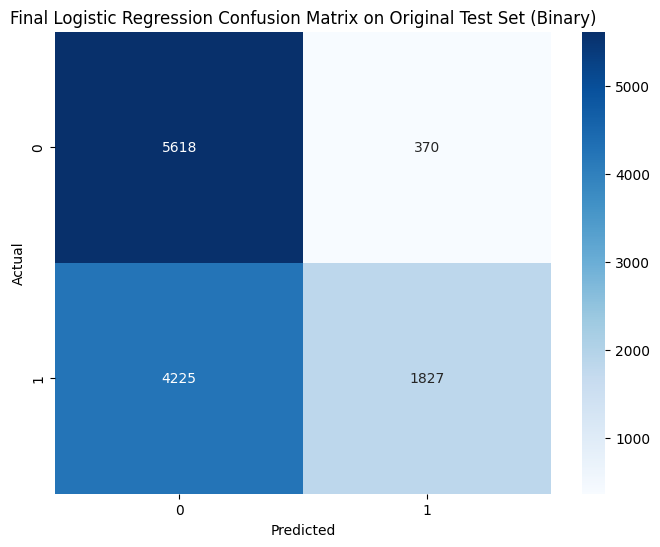

In [34]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Faire des prédictions sur l'ensemble de test avec le modèle de régression logistique entraîné
y_pred_final = final_model_lr.predict(X_test_scaled)

# Convertir les prédictions en valeurs binaires
y_pred_final_binary = np.where(y_pred_final > 0.5, 1, 0)

# Calculer les métriques de performance
accuracy_final_binary = accuracy_score(y_test, y_pred_final_binary)
precision_final_binary = precision_score(y_test, y_pred_final_binary)
recall_final_binary = recall_score(y_test, y_pred_final_binary)
f1_final_binary = f1_score(y_test, y_pred_final_binary)
confusion_final_binary = confusion_matrix(y_test, y_pred_final_binary)

# Afficher les résultats
print(f"Accuracy: {accuracy_final_binary}\nPrecision: {precision_final_binary}\nRecall: {recall_final_binary}\nF1-Score: {f1_final_binary}")

# Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_final_binary, annot=True, fmt='d', cmap='Blues')
plt.title('Final Logistic Regression Confusion Matrix on Original Test Set (Binary)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



### Conclusion

En résumé, notre recherche a démontré l'efficacité de diverses techniques de machine learning dans la prédiction des risques cardiovasculaires. Nous avons exploré plusieurs modèles tels que ***k-NN***, ***Arbre de décision***, ***Régression logistique*** et ***SVM***, en ajustant leurs paramètres pour optimiser leurs performances.

Les résultats ont clairement indiqué que la régression logistique a surpassé les autres modèles, affichant les meilleures métriques de performance, notamment le F1-Score. Le modèle final construit et évalué sur l'ensemble de test a présenté une précision de 83,15% et un rappel de 30,18%, donnant un F1-Score de 44,29%. Ces résultats témoignent de la capacité de généralisation de la régression logistique sur des données déséquilibrées tout en maintenant une performance robuste.

Cette étude souligne l'importance de la sélection des hyperparamètres et de l'évaluation approfondie des modèles pour obtenir des prédictions précises et fiables.</br>

Les méthodologies adoptées dans ce projet pourraient servir de référence pour des applications similaires dans le domaine de la santé, où des prévisions précises jouent un rôle essentiel dans la prise de décisions médicales et la gestion des risques.